# IMPORT

In [22]:
from datetime import datetime
from matplotlib import pyplot as plt, image as mp_img
import numpy as np

# COST

- Each model in the analyse, was selected more stable and newest one. (Research from website models description)
- Models got prices for input-prompt and output-prompt. (No cache and only text-prompt style, for data alignment)
- Considering 1M tokens, default unit measures. (~750.000 words, e.g.: 'hi' 1 token / 'running' -> 'runn' + 'ing' 2 tokens)

## data

### gather

#### openai

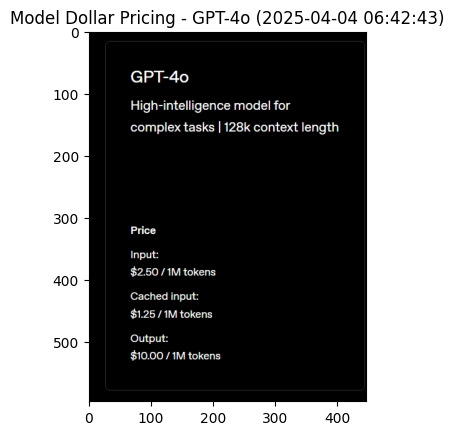

In [10]:
# plotting cost graph
gpt_cost_img_path = r'C:\Users\julio\Desktop\dev\artificial-intelligence\projects\function_calling\assets\image\pricing\gpt-4o.jpeg'

gpt_cost_img = mp_img.imread(gpt_cost_img_path)

plt.title(f'Model Dollar Pricing - GPT-4o ({datetime.now().replace(microsecond=0)})')
plt.imshow(gpt_cost_img)

In [11]:
# getting input/output values
gpt_input_cost = 2.5
gpt_output_cost = 10

gpt_input_cost, gpt_output_cost

(2.5, 10)

#### claude

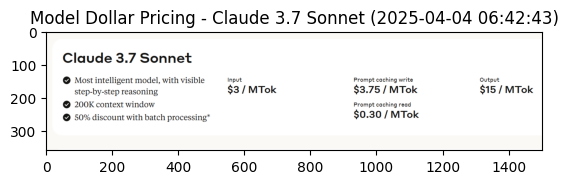

In [12]:
# plotting cost graph
claude_cost_img_path = r'C:\Users\julio\Desktop\dev\artificial-intelligence\projects\function_calling\assets\image\pricing\claude-3.7-sonnet.png'

claude_cost_img = mp_img.imread(claude_cost_img_path)

plt.title(f'Model Dollar Pricing - Claude 3.7 Sonnet ({datetime.now().replace(microsecond=0)})')
plt.imshow(claude_cost_img)

In [13]:
# getting input/output values
claude_input_cost = 3
claude_output_cost = 15

claude_input_cost, claude_output_cost

(3, 15)

#### gemini

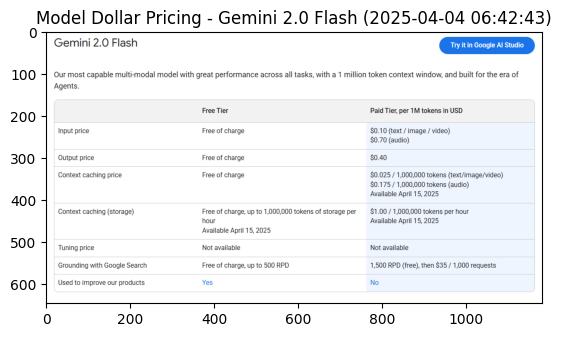

In [14]:
# plotting cost graph
gemini_cost_img_path = r'C:\Users\julio\Desktop\dev\artificial-intelligence\projects\function_calling\assets\image\pricing\gemini-2.0-flash.png'

gemini_cost_img = mp_img.imread(gemini_cost_img_path)

plt.title(f'Model Dollar Pricing - Gemini 2.0 Flash ({datetime.now().replace(microsecond=0)})')
plt.imshow(gemini_cost_img)

In [15]:
# getting input/output values
gemini_input_cost = 0.1
gemini_output_cost = 0.4

gemini_input_cost, gemini_output_cost

(0.1, 0.4)

## analyse

### bar

In [16]:
cost_bar_models = {
    'GPT': 'black', 
    'Claude': 'orange', 
    'Gemini': 'blue'
}

cost_bar_axis_x = np.linspace(0, len(cost_bar_models)*1.15, len(cost_bar_models))

# bar width & offset
cost_bar_width = 0.3
offset_bar_center = cost_bar_width / 2

# input
cost_bar_axis_x_input = cost_bar_axis_x - offset_bar_center
cost_bar_axis_y_input = ([gpt_input_cost, claude_input_cost, gemini_input_cost])

# output
cost_bar_axis_x_output = cost_bar_axis_x + offset_bar_center
cost_bar_axis_y_output = ([gpt_output_cost, claude_output_cost, gemini_output_cost])

len(cost_bar_axis_x_input), len(cost_bar_axis_y_input), len(cost_bar_axis_x_output), len(cost_bar_axis_y_output)

(3, 3, 3, 3)

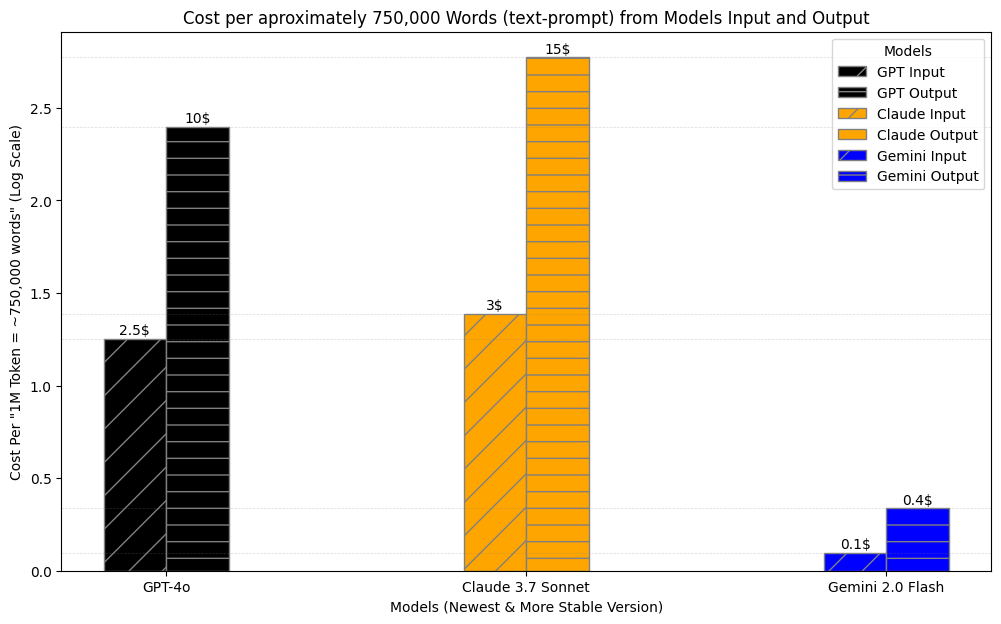

In [17]:
plt.figure(figsize=(12, 7))

for idx, (model_name, model_color) in enumerate(cost_bar_models.items()):

    cost_bar_x_input_value = cost_bar_axis_x_input[idx]
    cost_bar_y_input_value = cost_bar_axis_y_input[idx]

    input_bar = plt.bar(
        cost_bar_x_input_value, np.log1p(cost_bar_y_input_value), 
        width=cost_bar_width, color=model_color, label=f'{model_name} Input', edgecolor='gray', hatch='/')
    plt.bar_label(input_bar, labels=[f'{cost_bar_y_input_value}$'], padding=1)
    plt.axhline(y=np.log1p(cost_bar_y_input_value), color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

    cost_bar_x_output_value = cost_bar_axis_x_output[idx]
    cost_bar_y_output_value = cost_bar_axis_y_output[idx]

    output_bar = plt.bar(
        cost_bar_x_output_value, np.log1p(cost_bar_y_output_value), 
        width=cost_bar_width, color=model_color, label=f'{model_name} Output', edgecolor='gray', hatch='-')
    plt.bar_label(output_bar, labels=[f'{cost_bar_y_output_value}$'], padding=1)
    plt.axhline(y=np.log1p(cost_bar_y_output_value), color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlabel('Models (Newest & More Stable Version)')
plt.xticks(cost_bar_axis_x, ['GPT-4o', 'Claude 3.7 Sonnet', 'Gemini 2.0 Flash'])

plt.ylabel('Cost Per "1M Token = ~750,000 words" (Log Scale)')

plt.title('Cost per aproximately 750,000 Words (text-prompt) from Models Input and Output')
plt.legend(title='Models')

plt.show()

# CMD PT (code diff)

## load

In [18]:
import pandas as pd

code_pt_df = pd.read_json(r'C:\Users\julio\Desktop\dev\artificial-intelligence\projects\function_calling\assets\data\proc_pt\plot_1\code_pt.json')

code_pt_df

,openai,claude,gemini
0,"[[play], 1.3443348408]","[[play], 1.5060691833000002]","[[play], 1.4887480736]"
1,"[[reproduzir], 0.6551845074]","[[reproduzir], 2.3398013115]","[[tocar], 0.6626393795000001]"


## speed

In [19]:
bar_x = list(code_pt_df.columns)

bar_x

['openai', 'claude', 'gemini']

In [20]:
bar_y_code_en = list(code_pt_df.loc[0, :].apply(lambda x: x[1]))

bar_y_code_en

[1.3443348408, 1.5060691833000002, 1.4887480736]

In [21]:
bar_y_code_pt = list(code_pt_df.loc[1, :].apply(lambda x: x[1]))

bar_y_code_pt

[0.6551845074, 2.3398013115, 0.6626393795000001]

0 1.3443348408 0.6551845074
3 1.5060691833000002 2.3398013115
6 1.4887480736 0.6626393795000001


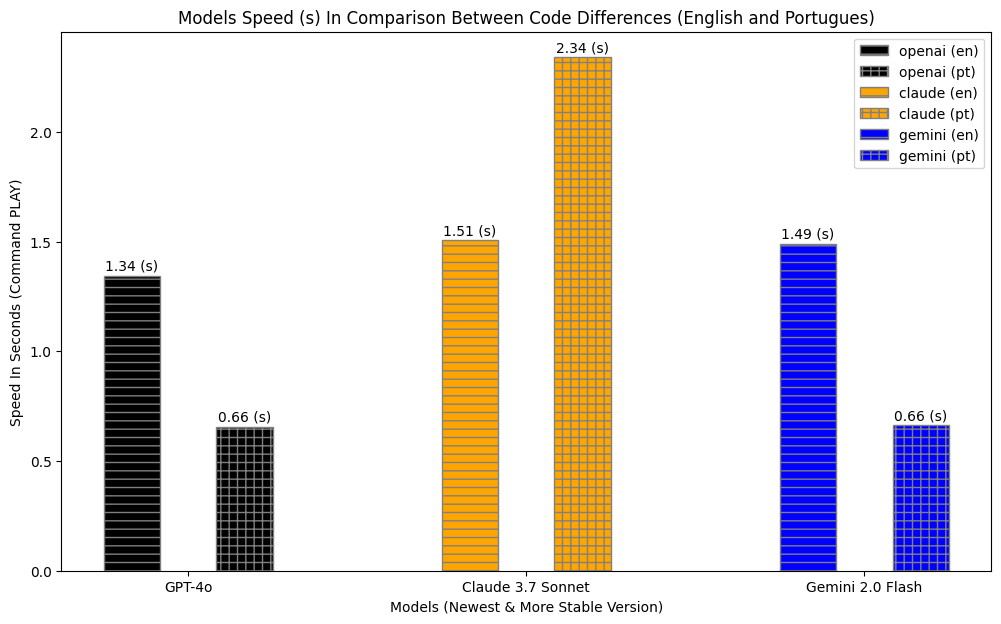

In [41]:
plt.figure(figsize=(12, 7))

bar_x_num = np.arange(0, len(bar_x)) * 3
bar_width = 0.5
offset = bar_width

for idx, (x, y_en, y_pt) in enumerate(zip(bar_x_num, bar_y_code_en, bar_y_code_pt)):

    print(x, y_en, y_pt)
    if idx == 0:
        name = 'openai'
        color = 'black'
    elif idx == 1:
        name = 'claude'
        color = 'orange'
    elif idx == 2:
        name = 'gemini'
        color = 'blue'

    bar_en = plt.bar(x - offset, y_en, color=color, width=bar_width, label=name+' (en)', hatch='--', edgecolor='gray')
    bar_pt = plt.bar(x + offset, y_pt, color=color, width=bar_width, label=name+' (pt)', hatch='++', edgecolor='gray')
    plt.bar_label(bar_en, labels=[f'{y_en:.2f} (s)'], padding=2)
    plt.bar_label(bar_pt, labels=[f'{y_pt:.2f} (s)'], padding=2)

plt.xlabel('Models (Newest & More Stable Version)')
plt.xticks(bar_x_num, ['GPT-4o', 'Claude 3.7 Sonnet', 'Gemini 2.0 Flash'])

plt.ylabel('Speed In Seconds (Command PLAY)')

plt.title('Models Speed (s) In Comparison Between Code Differences (English and Portugues)')
plt.legend()